In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('expected_ctc_processed.csv')

# Task
Build a salary predictor model using the dataset "salary_data.csv".

In [14]:
display(df.describe())
display(df.info())

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,12599.000000,1.259900e+04,12599.000000,12599.000000,12599.000000,12599.0,1.259900e+04
mean,12485.901183,34877.030240,12.140249,6.033018,2004.136757,2008.286372,2007.069291,1.643162e+06,3.520914,2.948964,1.038813,0.0,2.072178e+06
std,7224.734029,14392.481582,6.911726,5.412279,5.778725,5.450136,0.452587,8.222592e+05,1.676681,2.647644,1.337778,0.0,1.025937e+06
min,1.000000,10000.000000,0.000000,0.000000,1995.000000,1999.000000,2006.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,2.037440e+05
25%,6231.500000,22302.500000,7.000000,2.000000,2002.000000,2006.000000,2007.000000,1.008198e+06,2.000000,1.000000,0.000000,0.0,1.264731e+06
50%,12452.000000,34906.000000,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.700608e+06,3.000000,2.000000,0.000000,0.0,2.135673e+06
75%,18757.500000,47095.000000,17.000000,9.000000,2005.000000,2011.000000,2007.000000,2.234746e+06,5.000000,5.000000,2.000000,0.0,2.799120e+06
max,24999.000000,59996.000000,25.000000,23.000000,2020.000000,2023.000000,2009.000000,3.995535e+06,6.000000,8.000000,5.000000,0.0,5.114616e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12599 entries, 0 to 12598
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                12599 non-null  int64  
 1   Applicant_ID                       12599 non-null  int64  
 2   Total_Experience                   12599 non-null  int64  
 3   Total_Experience_in_field_applied  12599 non-null  int64  
 4   Department                         12599 non-null  object 
 5   Role                               12599 non-null  object 
 6   Industry                           12599 non-null  object 
 7   Organization                       12599 non-null  object 
 8   Designation                        12599 non-null  object 
 9   Education                          12599 non-null  object 
 10  Graduation_Specialization          12599 non-null  object 
 11  University_Grad                    12599 non-null  obj

None

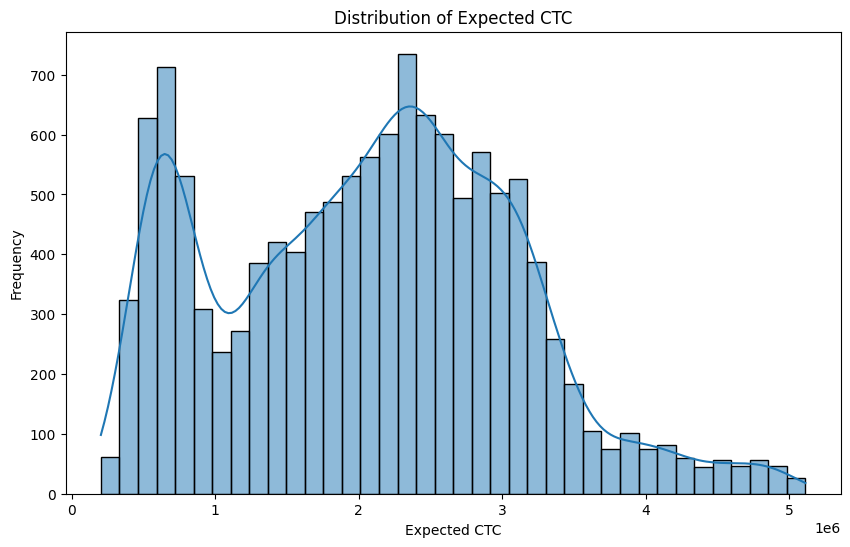

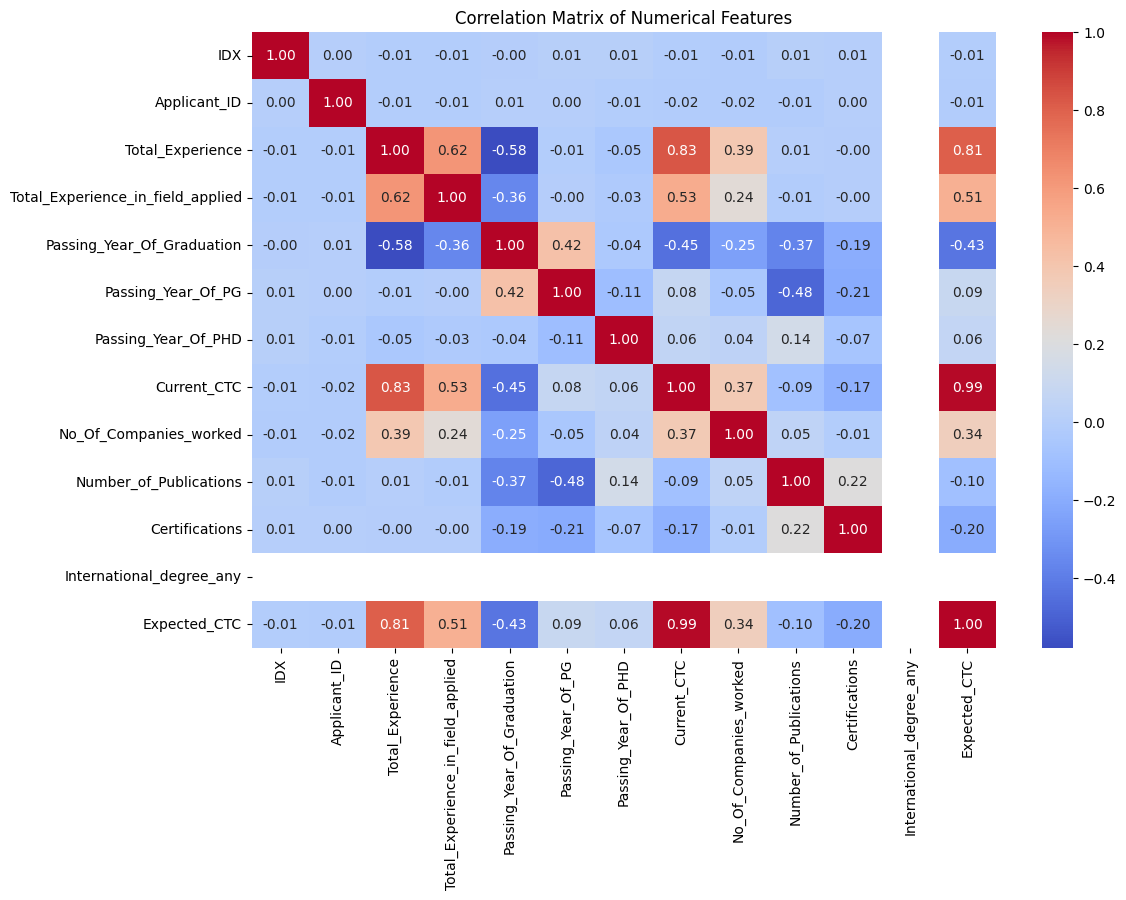

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Expected_CTC'], kde=True)
plt.title('Distribution of Expected CTC')
plt.xlabel('Expected CTC')
plt.ylabel('Frequency')
plt.show()

numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

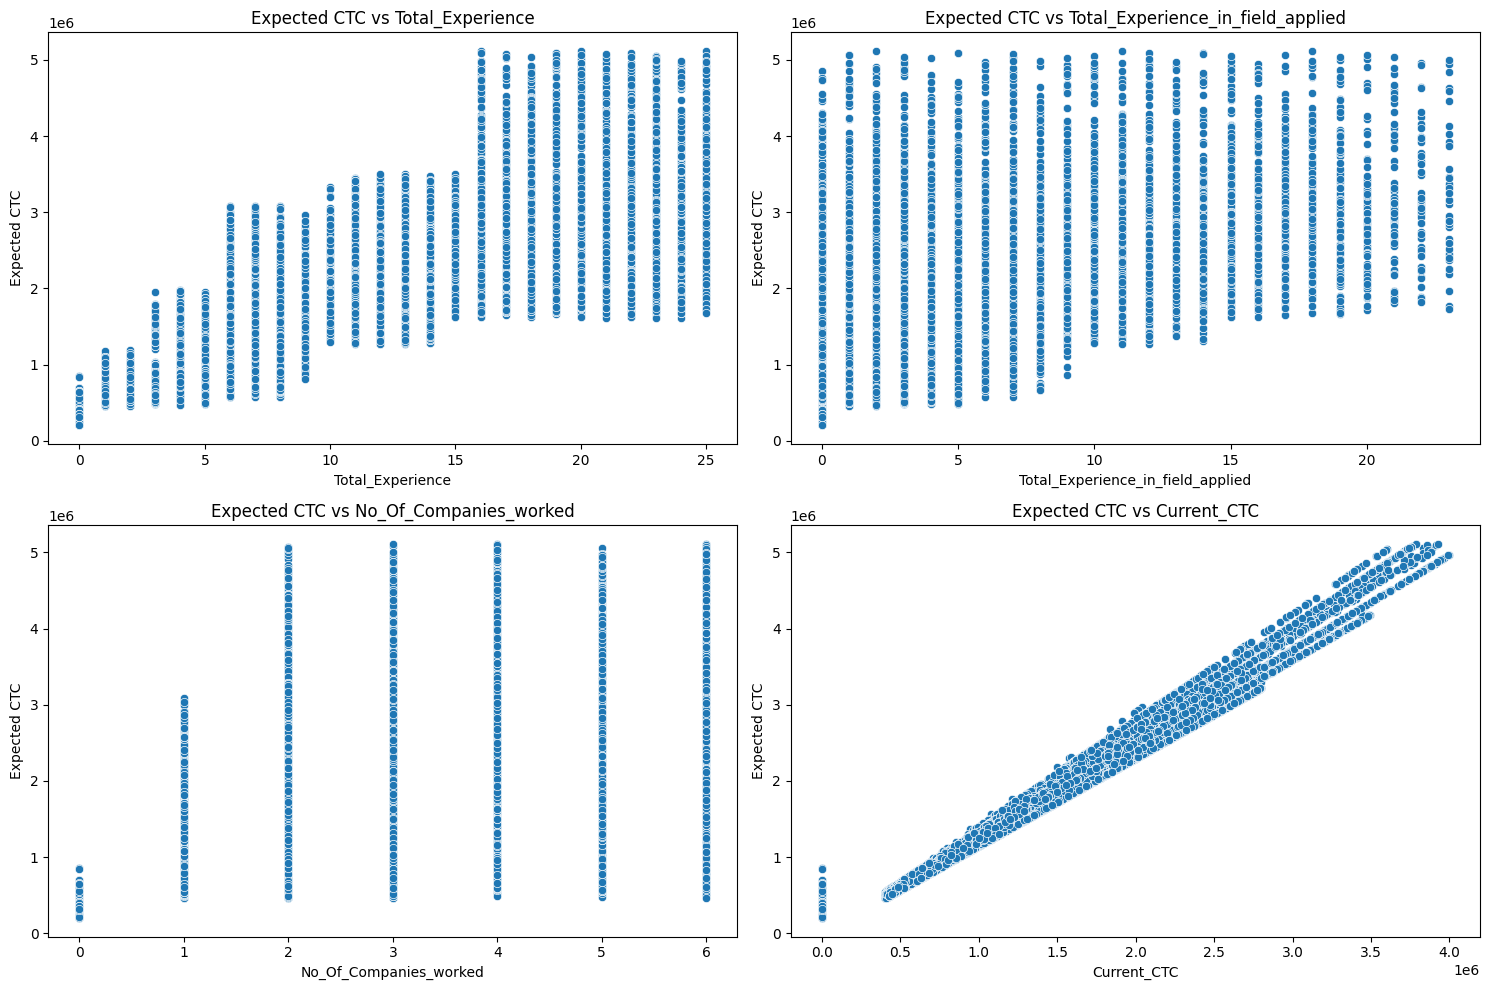

In [16]:
key_features = ['Total_Experience', 'Total_Experience_in_field_applied', 'No_Of_Companies_worked', 'Current_CTC']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df['Expected_CTC'])
    plt.title(f'Expected CTC vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Expected CTC')

plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Prepare the data for modeling. This may involve handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
The first step is to drop the 'IDX' and 'Applicant_ID' columns as they are identifiers and not useful for modeling.



In [17]:
df = df.drop(['IDX', 'Applicant_ID'], axis=1)

**Reasoning**:
Identify categorical columns in the DataFrame and apply one-hot encoding to them.



**Reasoning**:
The previous command failed because `handle_unknown` is not a valid argument for `pd.get_dummies`. I will remove this argument and proceed with one-hot encoding.



**Reasoning**:
The previous command failed because `sparse_output` is not a valid argument for `pd.get_dummies`. I will remove this argument and proceed with one-hot encoding.



In [18]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols)

**Reasoning**:
Separate the target variable from the features and split the data into training and testing sets.



In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Expected_CTC', axis=1)
y = df['Expected_CTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Reasoning**:
Identify numerical columns and apply standard scaling to the numerical columns in the training and testing sets.



In [20]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## Train a model

### Subtask:
Select and train a regression model to predict the 'Expected_CTC'. We can start with a simple model like Linear Regression and then explore more complex models if necessary.


**Reasoning**:
Import the LinearRegression model and train it using the training data.



In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared.


**Reasoning**:
Import the necessary evaluation metrics from sklearn.metrics and make predictions on the test set using the trained model.



In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

**Reasoning**:
Calculate and print the MAE, MSE, and R-squared scores to evaluate the model's performance.



In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 47268.6330352921
Mean Squared Error (MSE): 4107000260.7551107
R-squared (R2) Score: 0.9961722289994169


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regressor - R-squared (R2) Score: {r2_rf}")

Random Forest Regressor - Mean Absolute Error (MAE): 13007.786599867726
Random Forest Regressor - Mean Squared Error (MSE): 596929230.3974221
Random Forest Regressor - R-squared (R2) Score: 0.9994436551613232


**Reasoning**:
Use the trained random forest model to predict on the test data.



In [26]:
final_predictions = rf_model.predict(X_test)

In [27]:
# Calculate the percentage of predictions within 10% of the actual value
tolerance = 0.10
accurate_predictions = np.abs((y_test - final_predictions) / y_test) <= tolerance
accuracy_within_tolerance = np.mean(accurate_predictions) * 100

print(f"Percentage of predictions within {tolerance*100}% of actual CTC: {accuracy_within_tolerance:.2f}%")

Percentage of predictions within 10.0% of actual CTC: 98.61%


In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [30]:
best_params = grid_search.best_params_
tuned_rf_model = RandomForestRegressor(random_state=42, **best_params)
tuned_rf_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
